<a href="https://colab.research.google.com/github/shivam-kotwalia/data-science-project/blob/master/Active_Learning_modelAL_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q modAL

In [50]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import modAL
import sklearn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from modAL import ActiveLearner
from sklearn.ensemble import RandomForestClassifier
from modAL.uncertainty import uncertainty_sampling
from sklearn.metrics import confusion_matrix
from IPython import display

In [17]:
# Download data and split train/test 
digit, label = load_digits(return_X_y=True)
digit_train, digit_test, label_train, label_test = train_test_split(digit, label)

In [18]:
# from train data get the initial data(n_initial) for training
n_initial = 50
initial_index = np.random.choice(range(len(digit_train)), size=n_initial, replace=False)
digit_initial, label_initial = digit_train[initial_index], label_train[initial_index]
# delete data from train and get pool data
digit_pool, label_pool = np.delete(digit_train, initial_index, axis=0), np.delete(label_train, initial_index, axis=0)

In [30]:
print("Data Going in Training")
np.asarray(np.unique(label_initial, return_counts=True)).T

Data Going in Training


array([[0, 8],
       [1, 5],
       [2, 5],
       [3, 5],
       [4, 5],
       [5, 7],
       [6, 6],
       [7, 1],
       [8, 3],
       [9, 5]])

In [19]:
learner = ActiveLearner(estimator=RandomForestClassifier(),query_strategy=uncertainty_sampling, X_training=digit_initial, y_training=label_initial)

In [22]:
acc_score = [learner.score(digit_test, label_test)]
print(acc_score)

[0.7355555555555555]


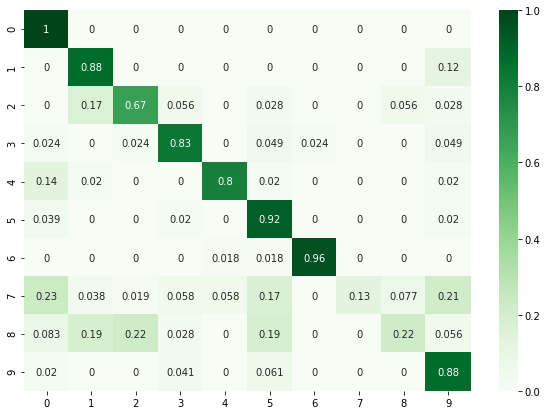

In [49]:
# Confusion Matrix 
def plot_cm(label_test, digit_test):
    plt.figure(figsize=(10,7))
    sns.heatmap(confusion_matrix(label_test, learner.predict(digit_test), labels=np.arange(0, 10), normalize="true"), annot=True, cmap="Greens")
    plt.show()
plot_cm(label_test, digit_test)

In [68]:
a = [2]
a

[2]

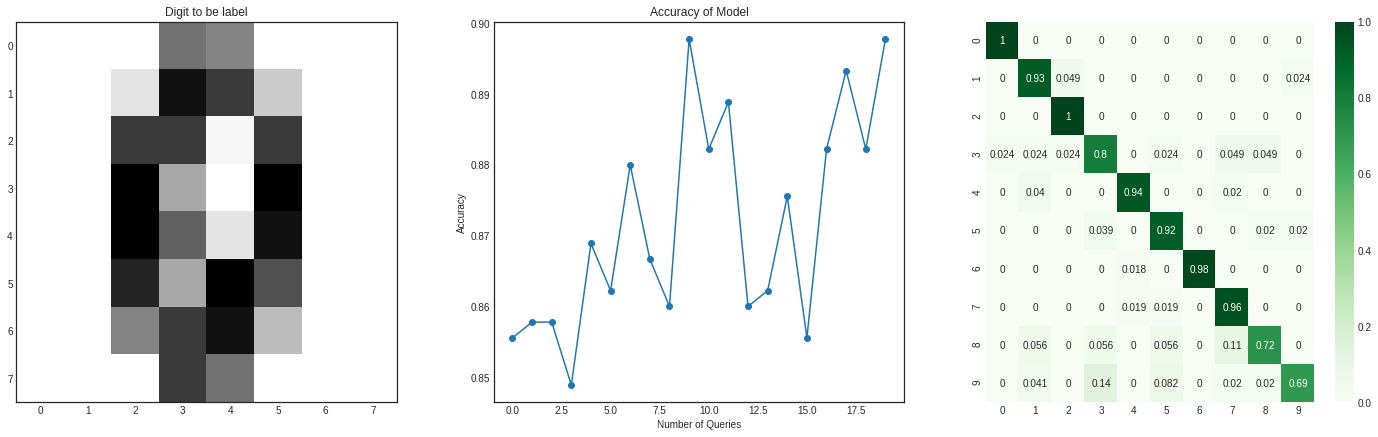

What is this digit ??
0


In [83]:
# How many images do you want to query ?
n_query = 20 
acc_score = [learner.score(digit_test, label_test)]

for q in range(n_query):
    display.clear_output(wait=True)
    query_index, query_inst = learner.query(digit_pool)
    with plt.style.context('seaborn-white'):
        plt.figure(figsize=(25, 7))
        plt.subplot(1,3,1)
        plt.title("Digit to be label")
        plt.imshow(query_inst.reshape((8,8)))
        plt.subplot(1,3,2)
        plt.title("Accuracy of Model")
        plt.plot(range(q+1), acc_score)
        plt.scatter(range(q+1), acc_score)
        plt.xlabel("Number of Queries")
        plt.ylabel("Accuracy")
        plt.subplot(1,3,3)
        sns.heatmap(confusion_matrix(label_test, learner.predict(digit_test), labels=np.arange(0, 10), normalize="true"), annot=True, cmap="Greens")
        display.display(plt.gcf())
        plt.close("all")
    print("What is this digit ??")
    label_new = np.array([int(input())], dtype=int)
    learner.teach(query_inst.reshape(1, -1), label_new)
    digit_pool, label_pool = np.delete(digit_pool, query_index, axis=0), np.delete(label_pool, query_index, axis=0)
    acc_score.append(learner.score(digit_test, label_test))